## New York Housing Market Data Analysis

Author: Luopeiwen Yi

Date. 01/22/2024

Having spent my undergraduate years at New York University, I developed a keen interest in the dynamics of New York's housing prices. The challenge of finding reasonably priced and value-for-money housing in NYC is monumental, given the myriad factors influencing prices. Over three years of apartment renting in the city allowed me to observe certain trends in the housing and rental market. Typically, location is paramount. For instance. properties on Manhattan Island (New York County) are generally the most expensive, followed by Long Island City (Queens County), with Brooklyn (Kings County) and Bronx County being comparatively more affordable. The size and type of housing also play crucial roles in determining price, with larger and higher-end properties generally commanding higher prices.

Despite these observations, I had not conducted formal data analysis to systematically explore the factors affecting housing prices in New York. The [New York housing market dataset](https://www.kaggle.com/datasets/nelgiriyewithana/new-york-housing-market) from Kaggle, comprising 4,801 properties and featuring 17 variables—including broker titles, house types, prices, bedrooms, bathrooms, square footage, and geographical coordinates—offers a comprehensive overview of the real estate market in the area. This analysis aims to identify the primary factors influencing New York housing prices. It will focus on:

- **Location-based analysis** to uncover geographical patterns and identify areas with varying property prices.
- **Property type analysis** to determine how different types of properties are valued in terms of price.
- **Property size analysis** to examine the relationship between property size and price.

Through this data-driven approach, I anticipate gaining quantitative insights into the housing options available in NYC, aiding in the search for optimal housing. Furthermore, this analysis will contribute to a broader understanding of the real estate market dynamics in New York, offering valuable information for potential buyers, sellers, and investors.

In [654]:
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import plotly.express as px

import warnings

warnings.filterwarnings("ignore")

NY_House = pd.read_csv("NY_House_Dataset.csv")

### Data Cleaning 

During the data cleaning phase, I ensured the absence of missing values within the dataframe and reviewed descriptive statistics for the price and property size columns, including mean, median, minimum, and maximum values. Although no values were immediately identifiable as erroneous, I applied the Interquartile Range (IQR) method to remove outliers from both the price and property size columns. This step refined the dataset for subsequent analysis by eliminating extreme values that could skew visualizations. After outlier removal, the dataset contained 4,411 observations. 

The property type column revealed 13 unique categories. To streamline the analysis, I consolidated "For Sale", "Contingent", "Land for Sale", "Pending", and "Coming Soon" into an "Other" category, after removing the "for sale" label from all categories for clarity, resulting in 9 distinct property types. 

In terms of location, after examining the locality, sublocality, and street name columns, I introduced a new column named "county" to represent the five boroughs of New York City, each corresponding to its own county: 'New York County' (Manhattan), 'Kings County' (Brooklyn), 'Queens County' (Queens), 'Bronx County' (the Bronx), and 'Richmond County' (Staten Island).

Additionally, a "market segment" column was created to classify properties into three price-based categories: "Affordable", "Mid-range", and "Luxury". This classification was based on price, with the lowest 25% designated as "Affordable", the highest 25% as "Luxury", and the middle range as "Mid-range".

In summary, the data cleaning process involved verifying and cleaning the price, property size, and property type columns, and creating two new columns: "county" and "market segment". These modifications facilitate the forthcoming analyses on location, property type, and property size, which aim to uncover the factors influencing New York housing prices.

In [676]:
NY_House.describe()

# Check missing value
print(
    "Are there any missing values in the dataframe?",
    NY_House.isnull().values.any(),
)

# check column PRICE
# demonstrate mean and median of column price
print("Mean of price column:", NY_House["PRICE"].mean())
print("Median of price column:", NY_House["PRICE"].median())
# find minimum and maximum values in column price
print("Minimum value of price column:", NY_House["PRICE"].min())
print("Maximum value of price column:", NY_House["PRICE"].max())

# check column PROPERTYSQFT
# demonstrate mean and median of column PROPERTYSQFT
print("Mean of PROPERTYSQFT column:", NY_House["PROPERTYSQFT"].mean())
print("Median of PROPERTYSQFT column:", NY_House["PROPERTYSQFT"].median())
# find minimum and maximum values in column PROPERTYSQFT
print("Minimum value of PROPERTYSQFT column:", NY_House["PROPERTYSQFT"].min())
print("Maximum value of PROPERTYSQFT column:", NY_House["PROPERTYSQFT"].max())

# check column TYPE
NY_House["TYPE"].unique()
# remove 'For sale', 'Contingent', ''Land for sale', 'Pending', 'Coming Soon'
# to be 'Other"
NY_House["TYPE"] = NY_House["TYPE"].replace(
    ["For sale", "Contingent", "Land for sale", "Pending", "Coming Soon"], "Other"
)
# if the last two word of the value in column TYPE is "for sale", get rid of
# the "for sale" part
NY_House["TYPE"] = NY_House["TYPE"].str.replace("for sale", "")
print(f"The unique values in column TYPE are: ", NY_House["TYPE"].unique())

# create a new column County
# check column Sublocality
NY_House["SUBLOCALITY"].unique()
NY_House.loc[NY_House["SUBLOCALITY"] == "New York"]["LOCALITY"].unique()
NY_House.loc[
    (NY_House["SUBLOCALITY"] == "New York") & (NY_House["LOCALITY"] == "United States")
]
# create a column County that is a duplicate of the column SUBLOCALITY
NY_House["County"] = NY_House["SUBLOCALITY"]
# Change the value in the column County that is "Manhatten" to "New York County"
NY_House.loc[NY_House["County"] == "Manhattan", "County"] = "New York County"
# Change the value in the column County that is "East Bronx" to "Bronx County"
NY_House.loc[NY_House["County"] == "East Bronx", "County"] = "Bronx County"
# Change the value in the column County that is "Brooklyn" to "Kings County"
NY_House.loc[NY_House["County"] == "Brooklyn", "County"] = "Kings County"
# Change the value in the column County that is "The Bronx" to "Bronx County"
NY_House.loc[NY_House["County"] == "The Bronx", "County"] = "Bronx County"
# Change the value in the column County that is "Queens" to "Queens County"
NY_House.loc[NY_House["County"] == "Queens", "County"] = "Queens County"
# Change the value in the column County that is "Staten Island" to "Richmond County"
NY_House.loc[NY_House["County"] == "Staten Island", "County"] = "Richmond County"
# Change the value in the column County that is "Coney Island" to "Kings County"
NY_House.loc[NY_House["County"] == "Coney Island", "County"] = "Kings County"
# Change the value in the column County that is "Brooklyn Heights" to "Kings County"
NY_House.loc[NY_House["County"] == "Brooklyn Heights", "County"] = "Kings County"
# Change the value in the column County that is "Jackson Heights" to "Queens County"
NY_House.loc[NY_House["County"] == "Jackson Heights", "County"] = "Queens County"
# Change the value in the column County that is "Riverdale" to "Bronx County"
NY_House.loc[NY_House["County"] == "Riverdale", "County"] = "Bronx County"
# Change the value in the column County that is "Rego Park" to "Queens County"
NY_House.loc[NY_House["County"] == "Rego Park", "County"] = "Queens County"
# Change the value in the column County that is "Fort Hamilton" to "Kings County"
NY_House.loc[NY_House["County"] == "Fort Hamilton", "County"] = "Kings County"
# Change the value in the column County that is "Flushing" to "Queens County"
NY_House.loc[NY_House["County"] == "Flushing", "County"] = "Queens County"
# Change the value in the column County that is "Dumbo" to "Kings County"
NY_House.loc[NY_House["County"] == "Dumbo", "County"] = "Kings County"
# Change the value in the column County that is "Snyder Avenue" to "Kings County"
NY_House.loc[NY_House["County"] == "Snyder Avenue", "County"] = "Kings County"
# check the unique value in County
NY_House["County"].unique()
# If the column County is "New York" and the column LOCALITY is "New York County"
# , change the value in the column County to "New York County"
NY_House.loc[
    (NY_House["County"] == "New York") & (NY_House["LOCALITY"] == "New York County"),
    "County",
] = "New York County"
# If the column County is "New York" and the column LOCALITY is "United States"
# change the value in the column County to the value in the column STREET_NAME
NY_House.loc[
    (NY_House["County"] == "New York") & (NY_House["LOCALITY"] == "United States"),
    "County",
] = NY_House["STREET_NAME"]
# check the unique value in County
NY_House["County"].unique()
# Change the value in the column County that is "The Bronx" to "Bronx County"
NY_House.loc[NY_House["County"] == "The Bronx", "County"] = "Bronx County"
# print the unique value in the column County
print(f"The unique value in the column County are: ", NY_House["County"].unique())


# remove the outliers in the price and property size column
# remove outliers based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered


# Removing outliers from the price and property size column
for col in ["PRICE", "PROPERTYSQFT"]:
    NY_House1 = remove_outliers(NY_House, col)

# Comparing the shapes of the original and filtered datasets
original_shape = NY_House.shape
filtered_shape = NY_House1.shape

print("Original shape of the dataset: ", original_shape)
print("Shape of the dataset after removing outliers: ", filtered_shape)

# create a new column MARKET_SEGMENT
# Define price thresholds for segments (adjust these as needed)
luxury_threshold = NY_House1["PRICE"].quantile(0.75)  # Top 25% as luxury
affordable_threshold = NY_House1["PRICE"].quantile(0.25)  # Bottom 25% as affordable

# Segment the properties
NY_House1["MARKET_SEGMENT"] = pd.cut(
    NY_House1["PRICE"],
    bins=[0, affordable_threshold, luxury_threshold, float("inf")],
    labels=["Affordable", "Mid-range", "Luxury"],
)
print(
    f"The unique values in column MARKET_SEGMENT are: ",
    NY_House1["MARKET_SEGMENT"].unique(),
)

Are there any missing values in the dataframe? False
Mean of price column: 2356940.17100604
Median of price column: 825000.0
Minimum value of price column: 2494
Maximum value of price column: 2147483647
Mean of PROPERTYSQFT column: 2184.207861758384
Median of PROPERTYSQFT column: 2184.207862
Minimum value of PROPERTYSQFT column: 230.0
Maximum value of PROPERTYSQFT column: 65535.0
The unique values in column TYPE are:  ['Condo ' 'House ' 'Townhouse ' 'Co-op ' 'Multi-family home ' 'Other'
 'Foreclosure' 'Mobile house ' 'Condop ']
The unique value in the column County are:  ['New York County' 'Richmond County' 'Kings County' 'Bronx County'
 'Queens County']
Original shape of the dataset:  (4801, 18)
Shape of the dataset after removing outliers:  (4411, 18)
The unique values in column MARKET_SEGMENT are:  ['Affordable', 'Mid-range', 'Luxury']
Categories (3, object): ['Affordable' < 'Mid-range' < 'Luxury']


### Location-Based Analysis

<Figure size 1500x1000 with 0 Axes>

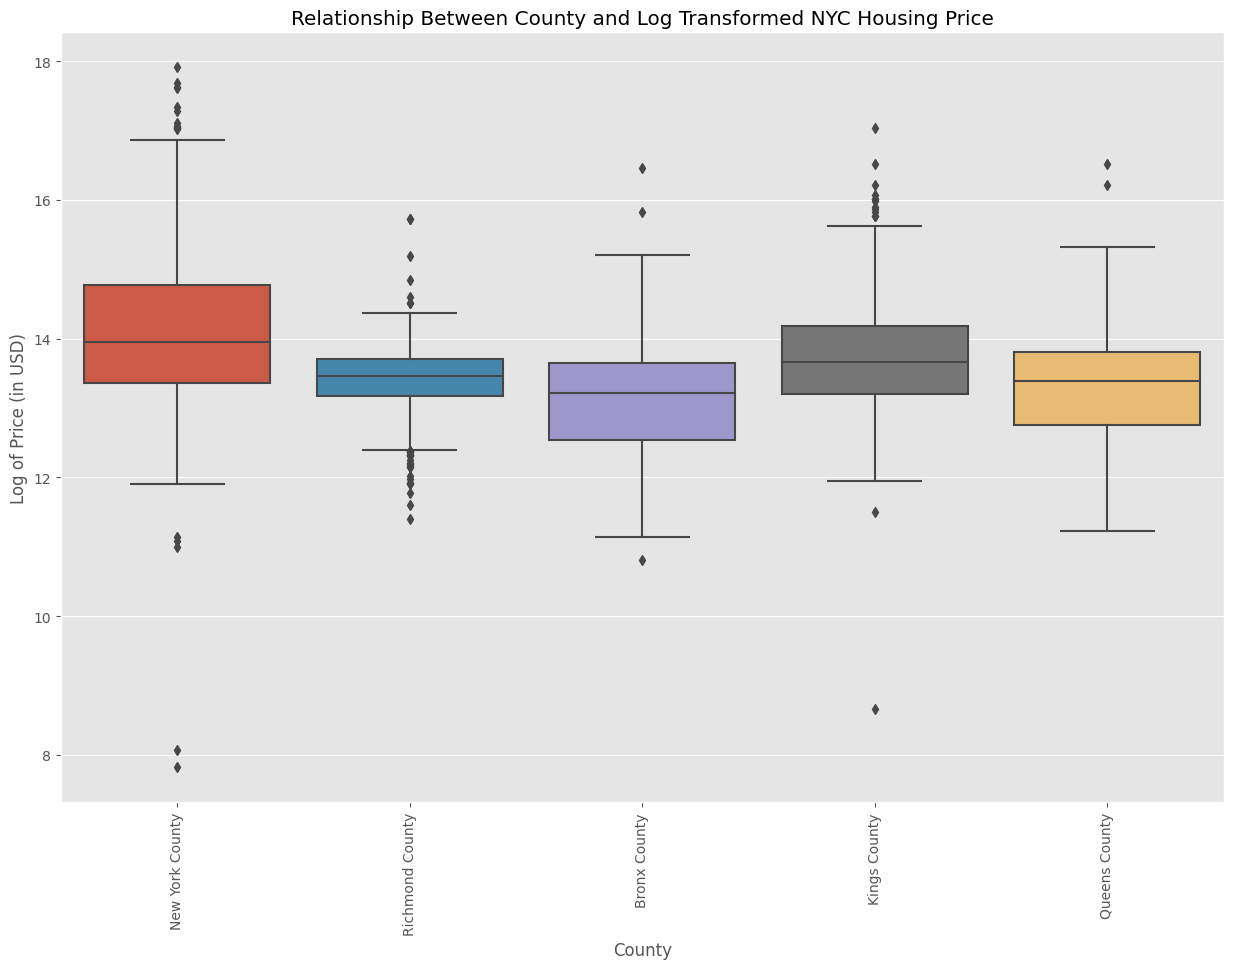

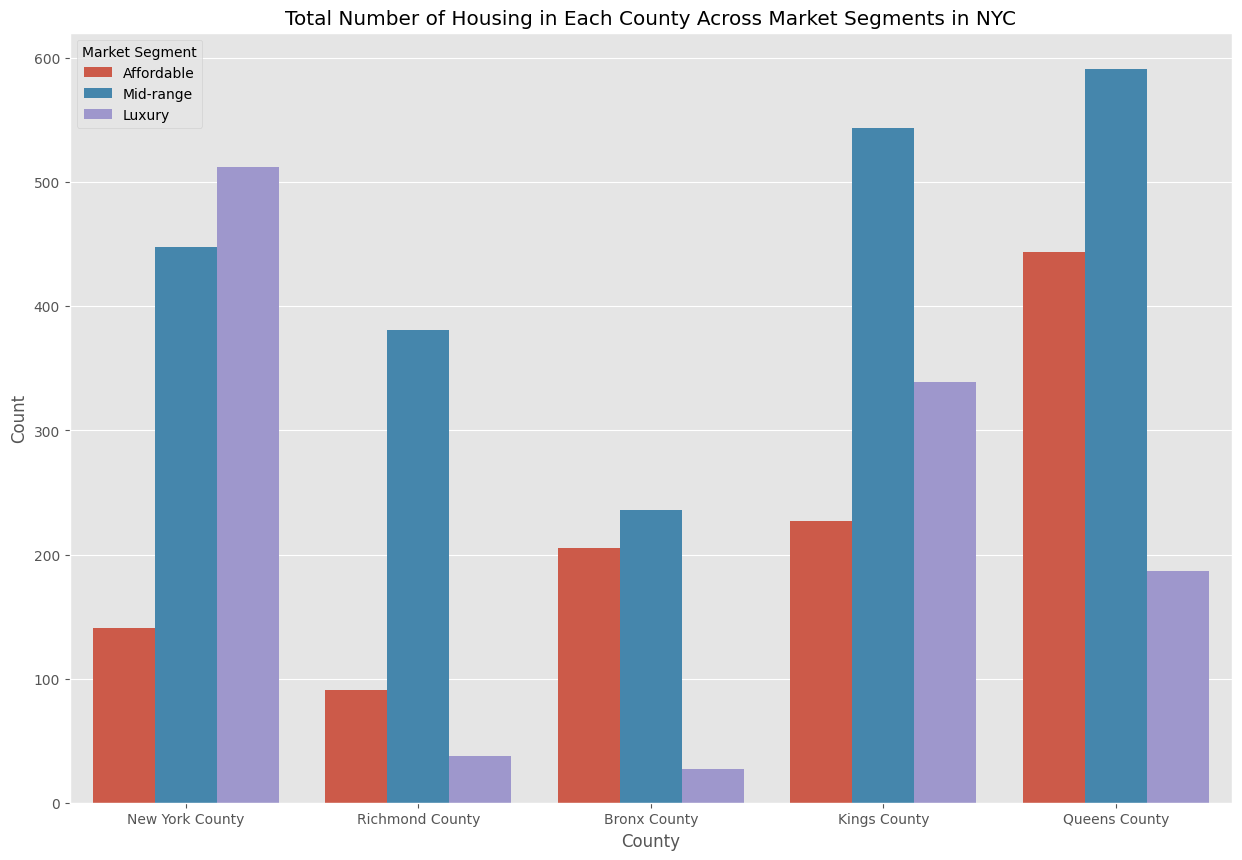

In [664]:
# strip plot of County VS Log of NYC House Price
plt.figure(figsize=(15, 10))

# Calculate the logarithm of the 'PRICE' column to
# get better visualization for large range values
# Adding 1 to the price to avoid taking log of zero
logged_price = np.log1p(NY_House1["PRICE"])

# Boxplot of County vs Log of NYC House Price
plt.figure(figsize=(15, 10))

sns.boxplot(x="County", y=logged_price, data=NY_House1)

plt.title("Relationship Between County and Log Transformed NYC Housing Price")
plt.xlabel("County")
plt.ylabel("Log of Price (in USD)")
plt.xticks(rotation=90)
plt.show()

# Histogram of Total Number of Houses in Each County Across Market Segments in NYC
plt.figure(figsize=(15, 10))
sns.countplot(data=NY_House1, x="County", hue="MARKET_SEGMENT")

plt.title("Total Number of Housing in Each County Across Market Segments in NYC")
plt.xlabel("County")
plt.ylabel("Count")
plt.legend(title="Market Segment")
plt.show()

# Bar Chart of Total Number of Houses in Each County Across Market Segments in NYC
# Counting the number of house per market segment in each county
Market_County_Count = (
    NY_House1.groupby(["County", "MARKET_SEGMENT"])
    .size()
    .reset_index(name="Market_County_Count")
)

# Specifying the order of counties on the x-axis
county_order = [
    "New York County",
    "Richmond County",
    "Bronx County",
    "Kings County",
    "Queens County",
]

# Customizing the color palette
color_sequence = px.colors.qualitative.Set2

# Creating a bar chart with the specified county order and color palette
fig = px.bar(
    Market_County_Count,
    x="County",
    y="Market_County_Count",
    color="MARKET_SEGMENT",
    title="Total Number of Housing in Each County Across Market Segments in NYC",
    labels={
        "County": "County",
        "Market_County_Count": "Count",
        "MARKET_SEGMENT": "Market Segment",
    },
    category_orders={"County": county_order},
    color_discrete_sequence=color_sequence,
)

fig.show()

# Bar Chart of Proportion of Houses in Each County Across Market Segments in NYC
# Calculate the total count per county to use for proportion calculation
total_count_per_county = Market_County_Count.groupby("County")[
    "Market_County_Count"
].transform("sum")

# Calculate the proportion of each market segment within each county
Market_County_Count["Proportion"] = (
    Market_County_Count["Market_County_Count"] / total_count_per_county
)

# Creating a bar chart with proportions instead of counts
fig = px.bar(
    Market_County_Count,
    x="County",
    y="Proportion",
    color="MARKET_SEGMENT",
    title="Proportion of Housing in Each County Across Market Segments in NYC",
    labels={
        "County": "County",
        "Proportion": "Proportion",
        "MARKET_SEGMENT": "Market Segment",
    },
    category_orders={"County": county_order},
    color_discrete_sequence=color_sequence,
)

# Adjust the layout
fig.update_layout(
    xaxis_title="County",
    yaxis_title="Proportion",
    yaxis=dict(tickformat=".1%", range=[0, 1]),  # Format y-axis as percentage
    legend_title="Market Segment",
    xaxis={"categoryorder": "array", "categoryarray": county_order},
)

fig.show()

# Bar Chart of Proportion of Houses in Each Market Segment Across Counties in NYC
# Counting the number of house per county in each market segment
County_Market_Count = (
    NY_House1.groupby(["MARKET_SEGMENT", "County"])
    .size()
    .reset_index(name="County_Market_Count")
)

# Calculate the total count per market to use for proportion calculation
total_count_per_market = County_Market_Count.groupby("MARKET_SEGMENT")[
    "County_Market_Count"
].transform("sum")

# Calculate the proportion of each market segment within each county
County_Market_Count["Proportion"] = (
    County_Market_Count["County_Market_Count"] / total_count_per_market
)

# Creating a bar chart with proportions instead of counts
fig = px.bar(
    County_Market_Count,
    x="MARKET_SEGMENT",
    y="Proportion",
    color="County",
    title="Proportion of Housing in Each Market Segment Across Counties in NYC",
    labels={
        "County": "County",
        "Proportion": "Proportion",
        "MARKET_SEGMENT": "Market Segment",
    },
    color_discrete_sequence=color_sequence,
)

# Adjust the layout
fig.update_layout(
    xaxis_title="Market Segment",
    yaxis_title="Proportion",
    yaxis=dict(tickformat=".1%", range=[0, 1]),  # Format y-axis as percentage
    legend_title="County",
)

fig.show()

![plot1](plot1.png)

![plot2](plot2.png)

![plot3](plot3.png)

The location-based analysis begins with a box plot illustrating the distribution of property prices across the five boroughs of New York City, following a logarithmic transformation of the price data to enhance visualization. This plot reveals that New York County exhibits the highest median housing price alongside the greatest variability in prices, characterized by a right-skewed distribution. This skew indicates a concentration of properties at higher price points compared to the general population. Conversely, Bronx County displays the lowest median price, with a left-skewed distribution, suggesting a prevalence of more affordably priced properties relative to other areas.

A histogram further delineates the total number of housing units within each market segment across the counties. Notably, New York County leads in luxury housing availability, while Queens County features the most affordable options. Kings and Queens Counties show a pronounced representation in the mid-range housing category. A stacked bar plot, emphasizing the total housing availability by county and market segment, underscores the dominance of New York, Kings, and Queens Counties in offering a broader array of housing options compared to Bronx and Richmond Counties.

Analysis of the proportion of housing within each market segment by county indicates that New York County has the highest share of luxury housing, at approximately 46.5%, rivaling the combined proportions of affordable and mid-range housing. Richmond County emerges with a significant majority of mid-range housing, about 74.7%, showcasing a market composition skewed away from luxury options. Bronx County is characterized by the largest share of affordable housing, around 43.8%, with lesser emphasis on mid-range and luxury segments.

When examining the distribution of housing across the affordable, mid-range, and luxury segments, Queens County is predominant in the affordable sector, housing around 40.1% of such units. Kings and Queens Counties are notably prevalent in the mid-range segment, while New York County captures the lion's share of the luxury market, approximately 46.4%, markedly surpassing other counties in this regard.

In summary, the average housing price is highest in New York County, indicative of its luxury market prominence. Queens County is distinguished by its abundance of affordable housing. The mid-range sector is more evenly spread across the boroughs, with Kings and Queens Counties slightly more pronounced. This analysis provides a comprehensive overview of the housing market distribution and pricing across New York City's counties, highlighting distinct patterns in affordability and luxury.

### Property Type Analysis 

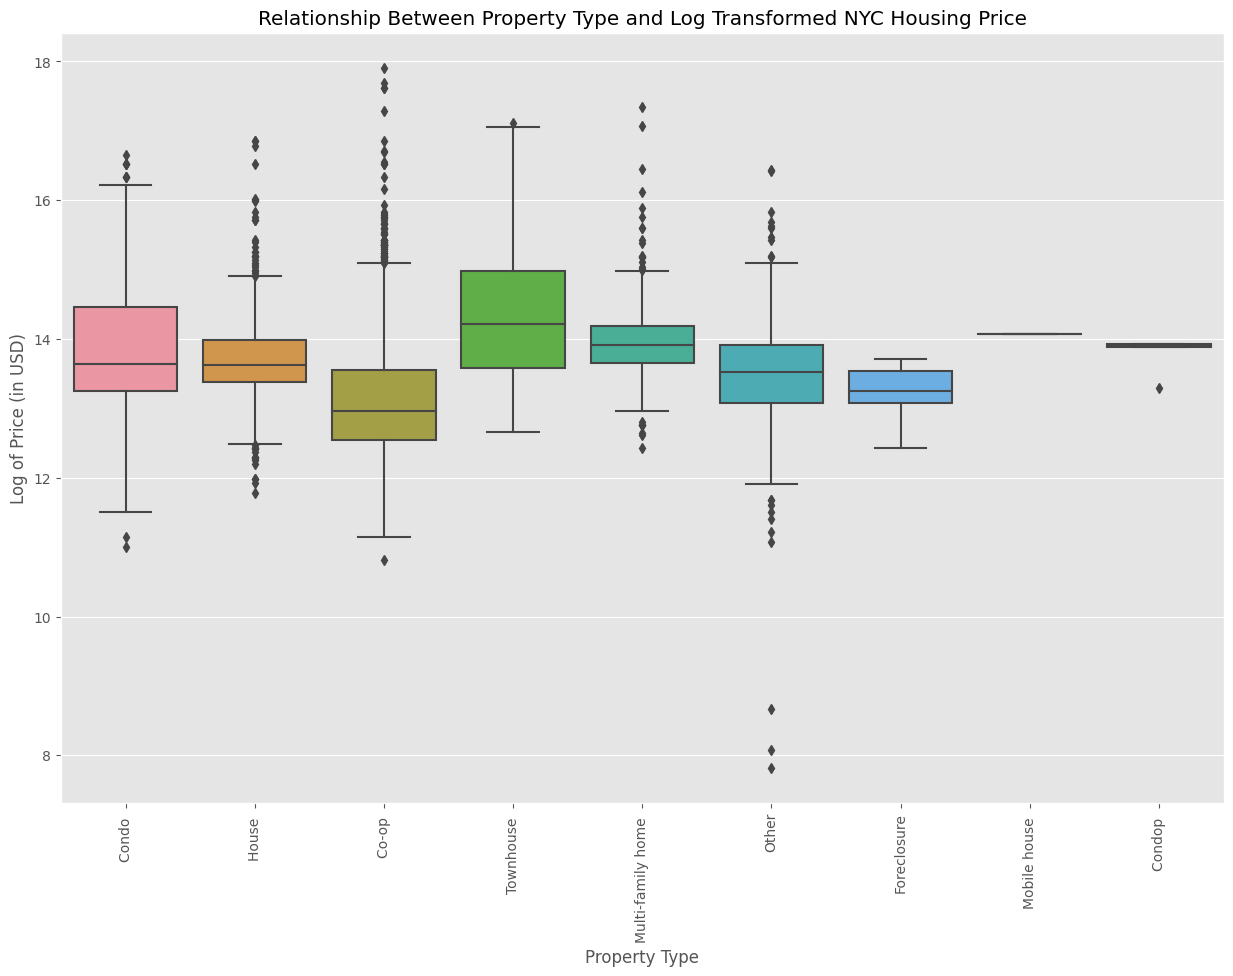

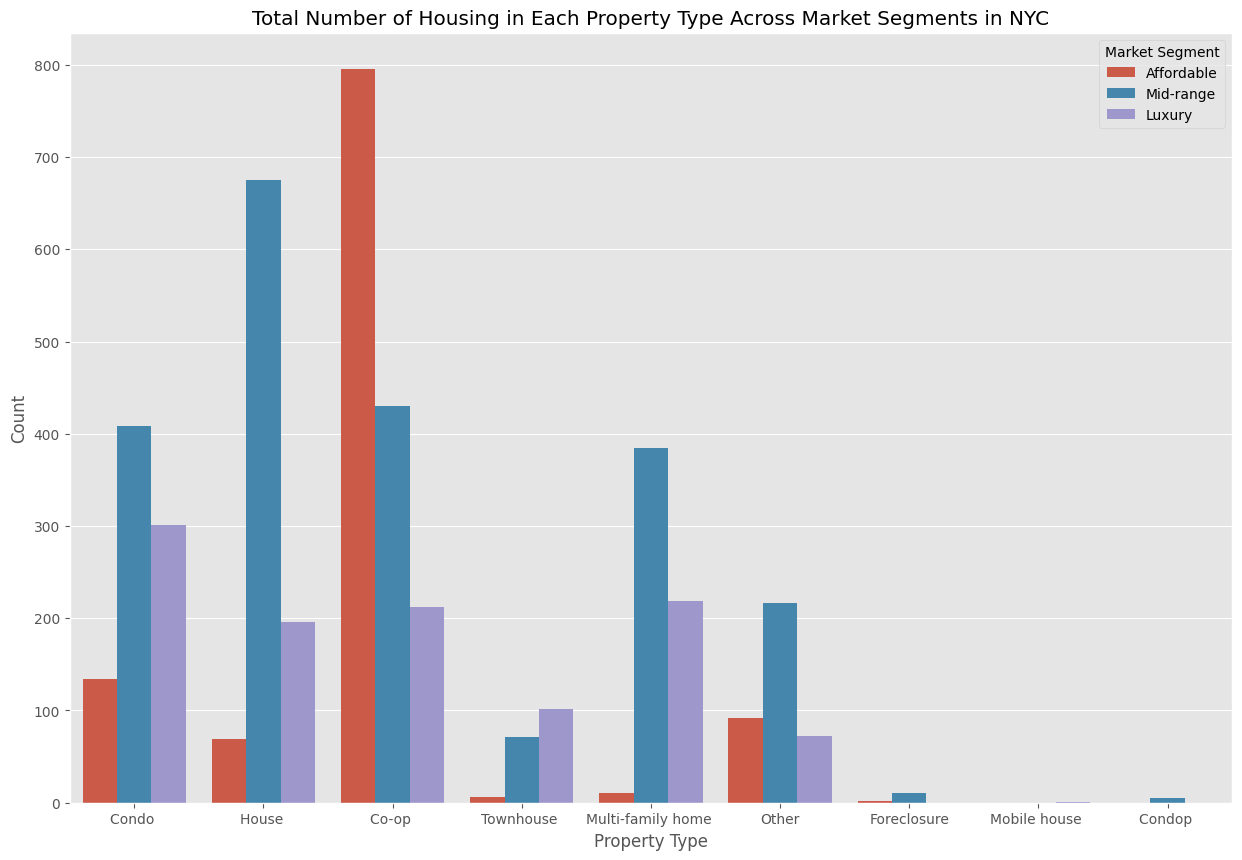

In [665]:
# box plot of log of price vs property type
plt.figure(figsize=(15, 10))

sns.boxplot(x="TYPE", y=logged_price, data=NY_House1)
plt.title("Relationship Between Property Type and Log Transformed NYC Housing Price")
plt.xlabel("Property Type")
plt.ylabel("Log of Price (in USD)")
plt.xticks(rotation=90)
plt.show()

# histogram of Total Number of Houses in Property Type Across Market Segments in NYC
plt.figure(figsize=(15, 10))

sns.countplot(data=NY_House1, x="TYPE", hue="MARKET_SEGMENT")
plt.title("Total Number of Housing in Each Property Type Across Market Segments in NYC")
plt.xlabel("Property Type")
plt.ylabel("Count")
plt.legend(title="Market Segment")
plt.show()

# Bar Chart of Proportion of Houses in Each Market Segment Across Types in NYC
# Counting the number of houses per property type in each market segment
Type_Market_Count = (
    NY_House1.groupby(["MARKET_SEGMENT", "TYPE"])
    .size()
    .reset_index(name="Type_Market_Count")
)

# Calculate the total count per market segment to use for proportion calculation
total_count_per_market = Type_Market_Count.groupby("MARKET_SEGMENT")[
    "Type_Market_Count"
].transform("sum")

# Calculate the proportion of each property type within each market segment
Type_Market_Count["Proportion"] = (
    Type_Market_Count["Type_Market_Count"] / total_count_per_market
)

# Customizing the color palette for better visual distinction
color_sequence = px.colors.qualitative.Pastel1 + px.colors.qualitative.Pastel2

# Creating a bar chart with proportions instead of counts, adjusted for property types
fig = px.bar(
    Type_Market_Count,
    x="MARKET_SEGMENT",
    y="Proportion",
    color="TYPE",  # Use TYPE for coloring each bar segment
    title="Proportion of Housing in Each Market Segment Across Property Types in NYC",
    labels={
        "TYPE": "Property Type",  # Adjust label for TYPE
        "Proportion": "Proportion",
        "MARKET_SEGMENT": "Market Segment",
    },
    color_discrete_sequence=color_sequence,
)

# Adjust the layout for a clearer presentation
fig.update_layout(
    xaxis_title="Market Segment",
    yaxis_title="Proportion",
    yaxis=dict(tickformat=".1%", range=[0, 1]),  # Format y-axis as percentage
    legend_title="Property Type",
)

fig.show()

![plot4](plot4.png)

The property type analysis begins with a box plot to depict the relationship between different property types and their prices in New York City, with a logarithmic transformation applied to prices for improved visualization. The analysis reveals that townhouses command the highest median price among property types, while co-ops are noted for the lowest median price. Foreclosures, as expected, display lower median prices, reflecting their market position often below value. Condos show the broadest price range, including numerous high-value outliers, indicating a luxury segment within the condo market.

A further analysis based on the total number of housing units across market segments in NYC highlights condos as leading in the luxury housing category. Houses show predominance in the mid-range category, while co-ops represent the majority of affordable housing. Townhouses, foreclosures, mobile homes, and condops are significantly less common in the market compared to other housing types.

Examining the proportion of property types within each market segment, co-ops emerge as the most substantial contributor to affordable housing, comprising 71.8% of this segment. The mid-range market features a more balanced distribution among property types, with houses and condos occupying notable shares. Conversely, condos predominate in the luxury segment, underscoring their significant presence.

Overall, condos, houses, and multi-family homes appeal broadly to the middle class and wealthier demographics, evidenced by their substantial numbers in both the mid-range and luxury markets. Co-ops, often more affordable, offer a large number of options, likely influenced by factors such as amenities, ownership structures, and location. Foreclosures, while typically affordable, are scarce in the market, aligning with their lower price points and the specific circumstances of such sales.

### Property Size Analysis 

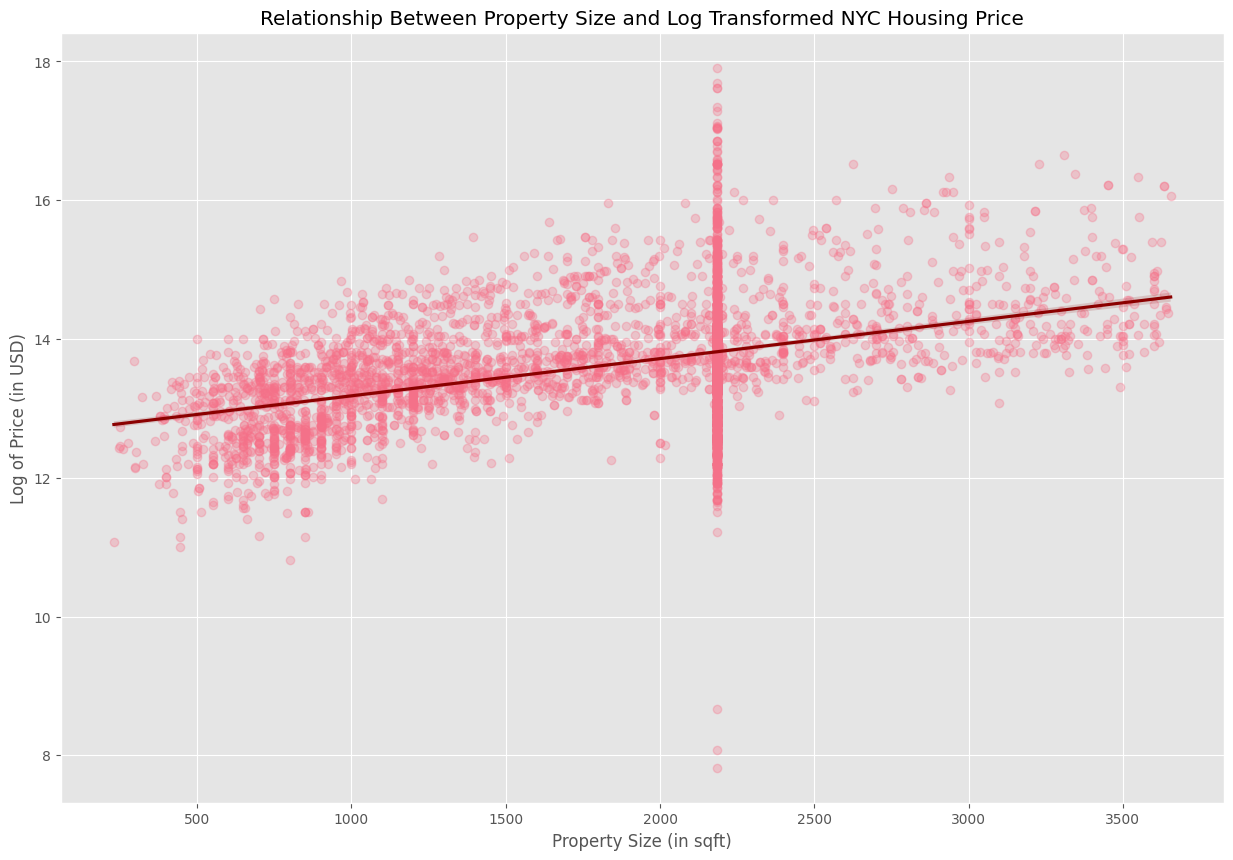

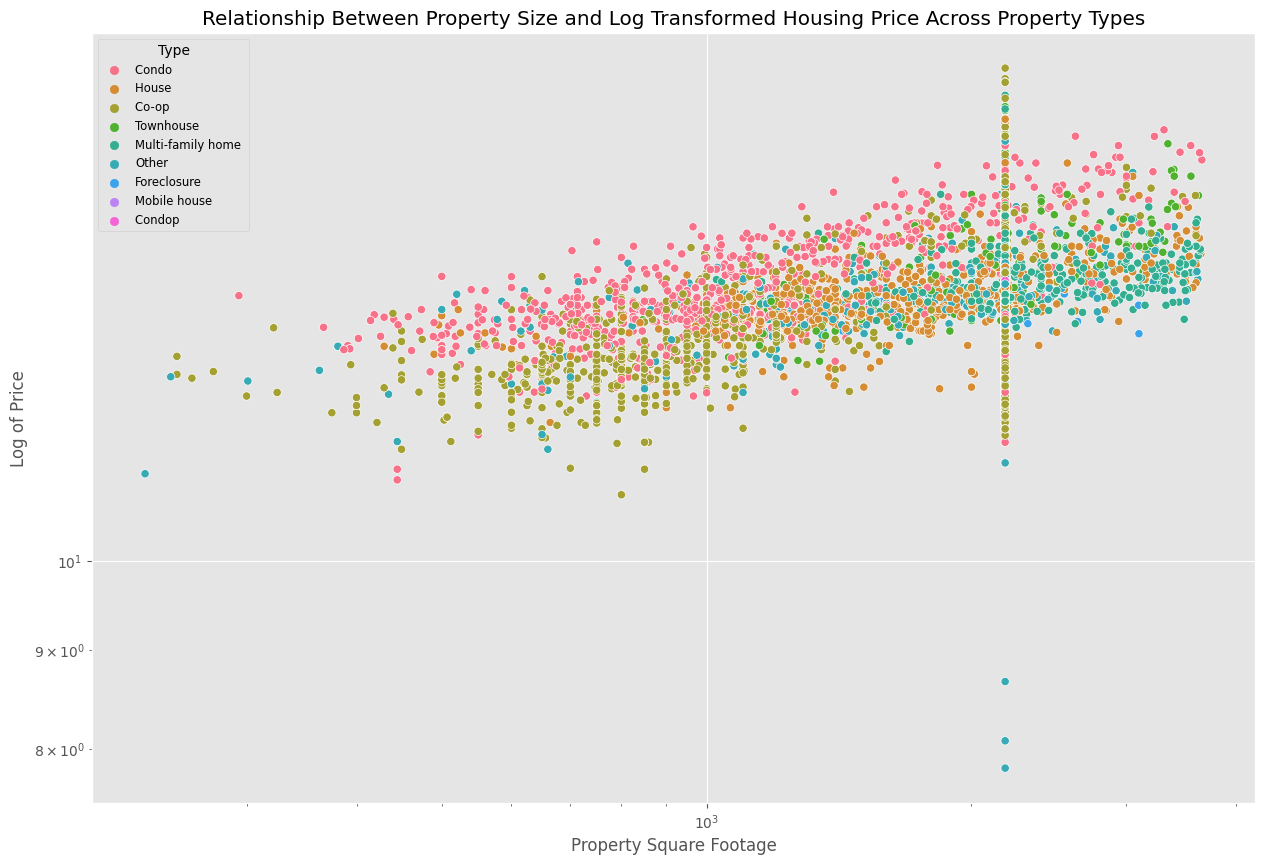

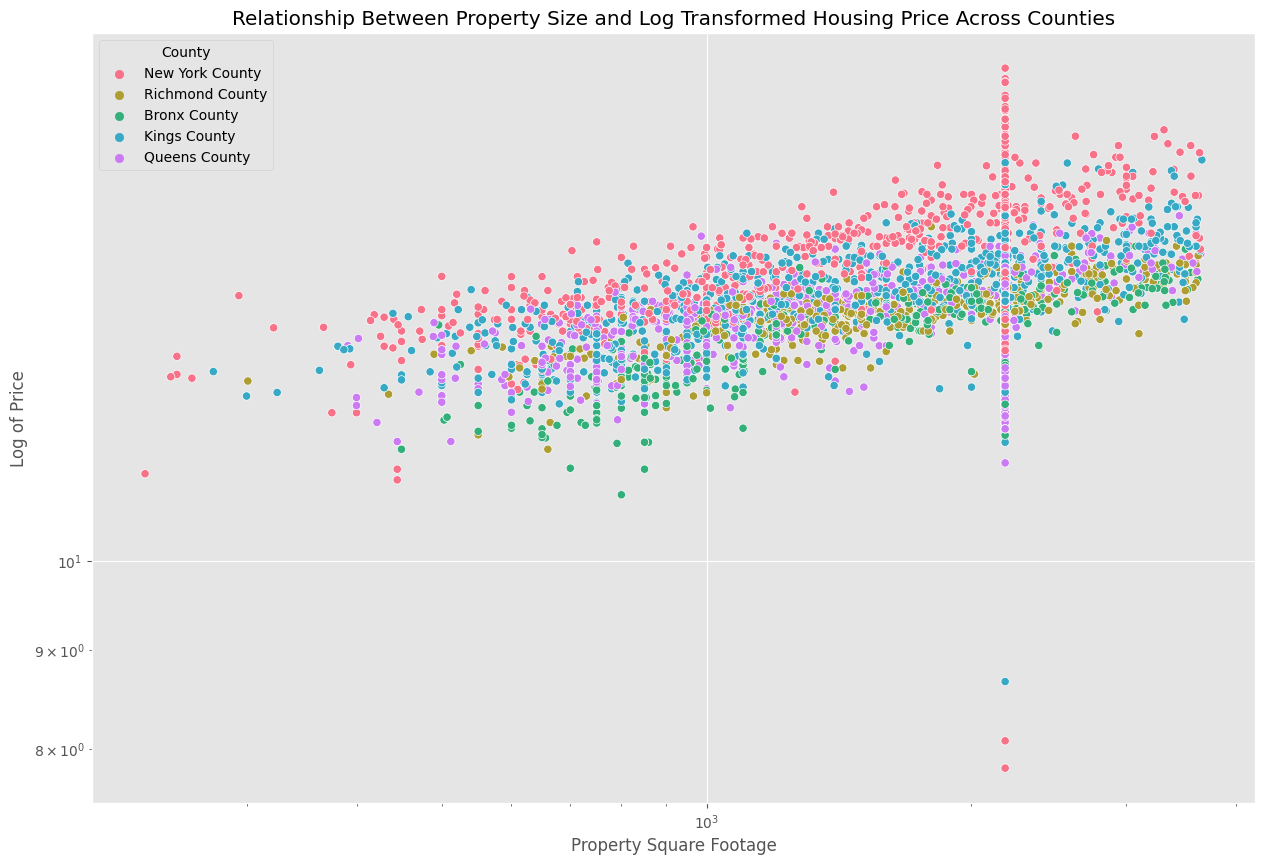

In [659]:
# Plot a scatter plot of the log price vs the property size and fit a regression line
plt.figure(figsize=(15, 10))

# Choose a seaborn color palette
palette = sns.color_palette("husl", n_colors=1)

sns.regplot(
    x="PROPERTYSQFT",
    y=logged_price,
    data=NY_House1,
    scatter_kws={"alpha": 0.3, "color": palette[0]},
    line_kws={"color": "darkred"},
)

plt.title("Relationship Between Property Size and Log Transformed NYC Housing Price")
plt.xlabel("Property Size (in sqft)")
plt.ylabel("Log of Price (in USD)")
plt.show()

# scatter plot of log of price vs property size across proporty types
plt.figure(figsize=(15, 10))
scatter_plot_multicolor = sns.scatterplot(
    data=NY_House1,
    x="PROPERTYSQFT",
    y=logged_price,
    hue="TYPE",
    palette="husl",
)

# Set the scale of x and y axes to logarithmic
plt.xscale("log")
plt.yscale("log")

scatter_plot_multicolor.set_title(
    "Relationship Between Property Size and Log Transformed Housing Price Across Property Types"
)
scatter_plot_multicolor.set_xlabel("Property Square Footage")
scatter_plot_multicolor.set_ylabel("Log of Price")

plt.legend(title="Type", fontsize="small")

plt.show()

# scatter plot of log of price vs property size across counties
plt.figure(figsize=(15, 10))
scatter_plot_multicolor = sns.scatterplot(
    data=NY_House1,
    x="PROPERTYSQFT",
    y=logged_price,
    hue="County",
    palette="husl",
)

# Set the scale of x and y axes to logarithmic
plt.xscale("log")
plt.yscale("log")

scatter_plot_multicolor.set_title(
    "Relationship Between Property Size and Log Transformed Housing Price Across Counties"
)
scatter_plot_multicolor.set_xlabel("Property Square Footage")
scatter_plot_multicolor.set_ylabel("Log of Price")

plt.show()

The initial property size analysis, depicted through a scatter plot, examines the relationship between property size and the logarithmically transformed prices of housing in New York City. The trend line in the plot has a positive slope, which suggests a positive correlation between property size and price in NYC: As the size of the property increases, the price tends to increase as well. However, the wide dispersion of data points at each property size level suggests significant price variability for similarly sized properties. This variability implies that other factors, such as location or property type, may also play critical roles in determining prices. Notably, the density of data points is higher for smaller properties, hinting at their prevalence or at greater price variability within this segment.

The subsequent analysis, illustrated through a color-dispersed plot, shows that various property types span a broad spectrum of sizes and prices. For properties of identical size, condos tend to be pricier, while co-ops offer a wider range of prices, including some of the most affordable options.

A third plot, also utilizing color dispersion, reveals that properties across different locations cover a wide array of sizes and prices. Properties in New York County consistently show higher prices for various sizes, reflecting the premium real estate market in this area. The plot also highlights a concentration of smaller-sized properties, aligning with Manhattan's high valuation of compact apartments. In contrast, properties in Kings and Queens counties exhibit lower prices over a diverse size range. Richmond County properties generally present very low prices, regardless of size. Properties in Bronx County are noted for being the most affordable across all sizes, offering the most accessible housing options. Overall, properties of the same size in New York County are markedly more expensive than those in other counties, with Kings and Queens counties offering a broader price range, and Bronx County emerging as the most budget-friendly option.

### Summary

In this presentation, I have explored various factors influencing New York City's housing prices, offering insights into the dynamics of the real estate market. The first factor is housing location. New York County stands out as the priciest, a reflection of its luxury market, with Kings, Queens, Richmond, and Bronx Counties trailing in cost. Contrasting sharply with New York County's high-end offerings, Bronx County presents the most accessible and budget-friendly options. Queens County is distinguished by its abundance of affordable housing, whereas Kings and Queens Counties predominantly offer a wider selection of mid-range housing options. The second factor is housing type. Condos are typically the most expensive, dominating the luxury segment, likely because of their high-end features within the city. They, along with houses and multi-family homes, cater to middle-class and affluent buyers, as demonstrated by their significant representation in both mid-range and luxury markets. Conversely, co-ops tend to be more affordable, offering an accessible option for those seeking value. The third factor is property size. A positive correlation exists between property size and price, with larger properties commanding higher prices in NYC. 

This analysis offers critical insights for buyers, sellers, and investors, illuminating the diverse factors that influence the New York City housing market's pricing dynamics. Based on the findings, I recommend the following for prospective buyers: Affluent individuals looking for luxury may be most attracted to large-sized condos in New York County; middle-class buyers interested in mid-range accommodations should explore small to medium-sized condos, houses, or multi-family homes in Kings or Queens County; and those with budget constraints seeking affordable housing options might find small-sized co-ops in Queens, Richmond, or Bronx Counties ideal. These recommendations are designed to assist buyers in navigating the NYC real estate landscape, ensuring that their housing choices align with their financial means and lifestyle preferences. Ultimately, this analysis aims to empower stakeholders across the spectrum, fostering a more inclusive and informed real estate environment in NYC, aligning financial capabilities and lifestyle preferences with the ideal housing solutions. 